In [1]:
from google.colab import files
import pandas as pd

# Upload your dataset
uploaded = files.upload()

# Load the dataset
data = pd.read_csv("creditcard.csv")
display(data.head())


Saving creditcard.csv to creditcard.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from sklearn.preprocessing import StandardScaler

# Separate features (exclude target 'Class')
X = data.drop(columns=['Class'])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled ✅")


Features scaled ✅


In [4]:
from sklearn.cluster import KMeans

# Choose number of clusters, e.g., 2 (fraud vs non-fraud)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
data['Cluster'] = clusters
display(data[['Cluster']].head())


,Cluster
0,0
1,0
2,0
3,0
4,0


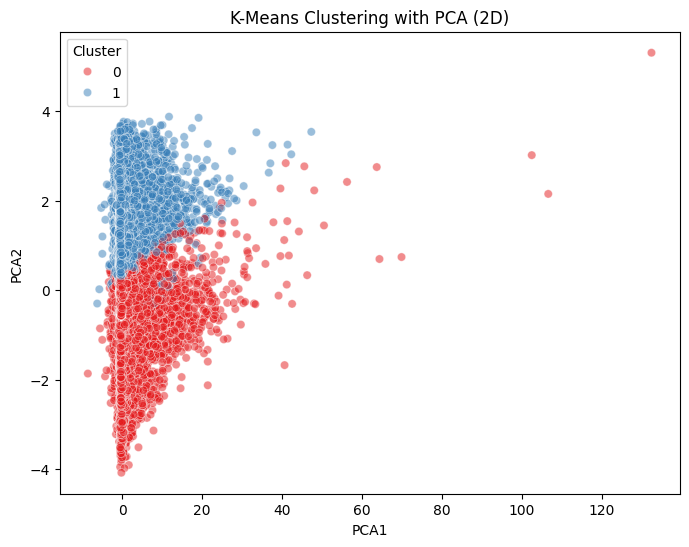

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create dataframe for plotting
plot_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
plot_df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=plot_df, palette='Set1', alpha=0.5)
plt.title("K-Means Clustering with PCA (2D)")
plt.show()


Example Insights:

The clustering separates the data into two main groups.

PCA helps to visualize high-dimensional data in 2D.

One cluster may correspond mostly to fraudulent transactions (Class 1), the other to non-fraud (Class 0).

Clustering can help detect patterns in transactions without using labels.
